In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,classification_report,precision_recall_curve,auc

import xgboost as xgb
import shap

import warnings 
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("Telco_customer_churn.csv")
df.head()
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [8]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [11]:
df['Total Charges']=pd.to_numeric(df['Total Charges'],errors='coerce')

for col in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [19]:
X=df.drop(['Churn Value','Churn Score','Churn Reason'],axis=1)
y=df['Churn Label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [20]:
model=xgb.XGBClassifier(n_estimators=350,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,max_depth=6,eval_metric="logloss")
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
pred_prob=model.predict_proba(X_test)[:,1]
auc_score=roc_auc_score(y_test,pred_prob)
print("AUC score",auc_score)

AUC score 1.0


precision- Recall Auc 1.0


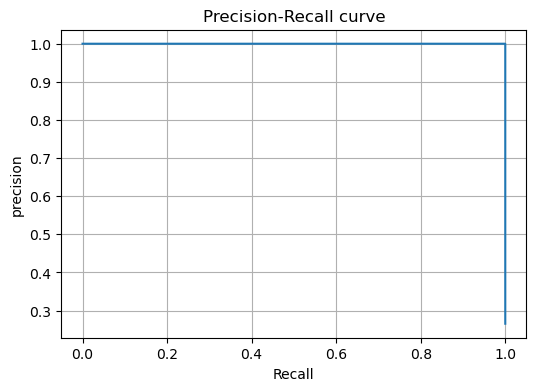

In [23]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_prob)
pr_auc=auc(recall,precision)
print("precision- Recall Auc",pr_auc)

plt.figure(figsize=(6,4))
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision-Recall curve")
plt.grid(True)
plt.show()

In [25]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_train)

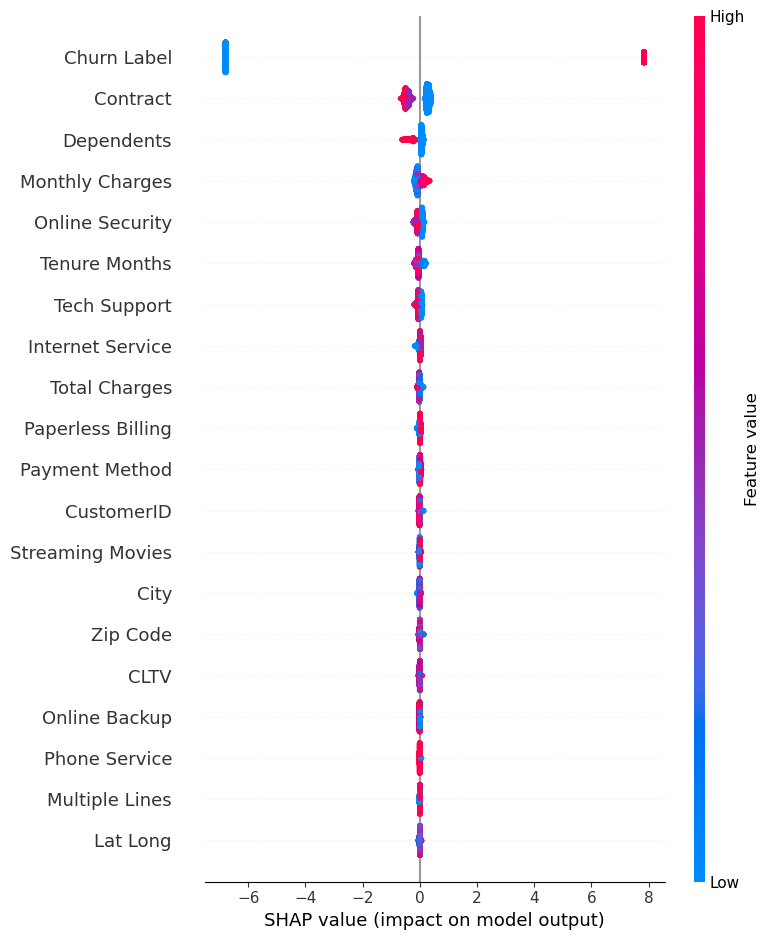

In [26]:
shap.summary_plot(shap_values,X_train,plot_type="dot")

Top 5 import features: ['Online Security', 'Monthly Charges', 'Dependents', 'Contract', 'Churn Label']


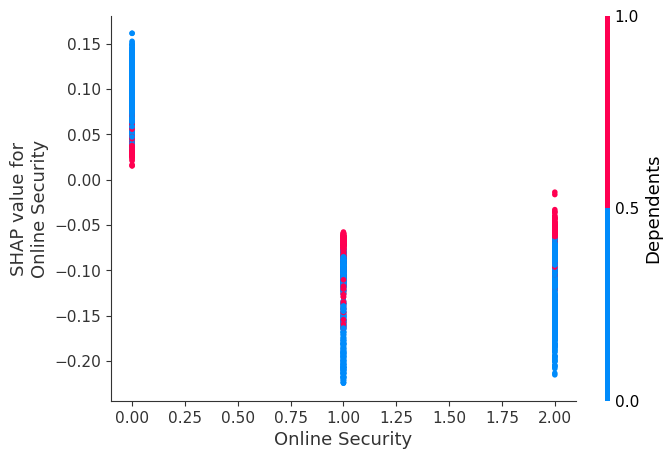

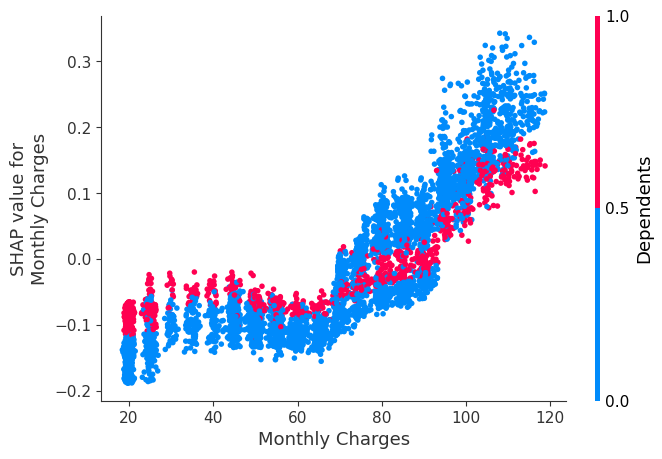

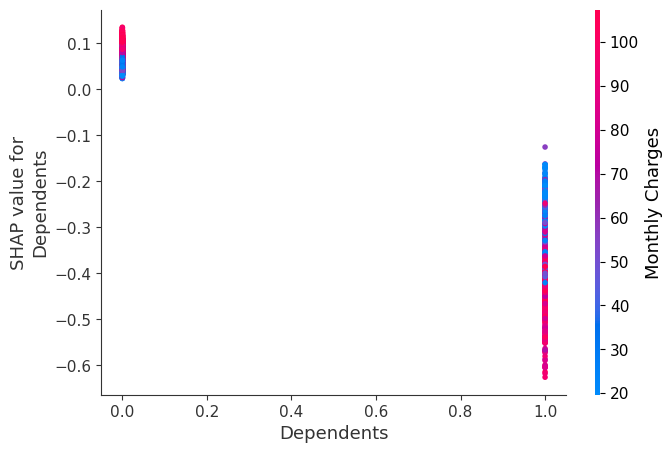

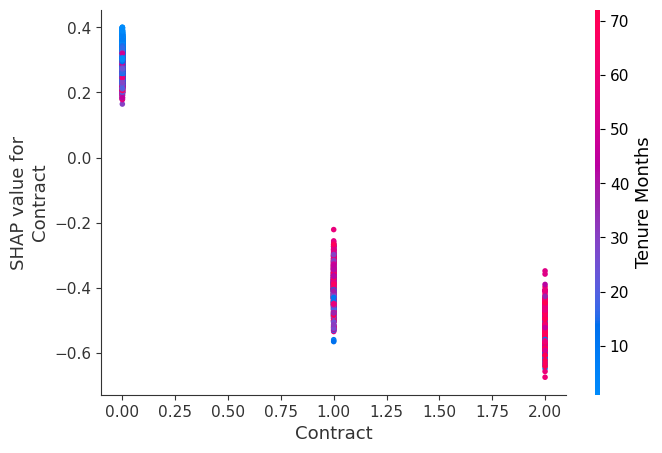

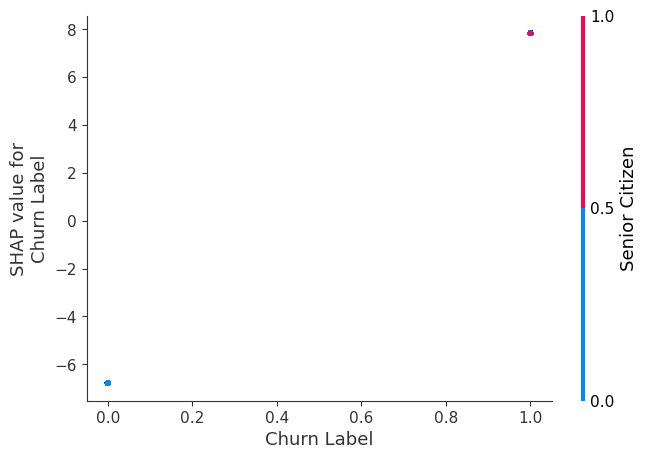

In [28]:
top5=np.argsort(np.abs(shap_values).mean(0))[-5:]
top5_features=X_train.columns[top5]
print("Top 5 import features:",top5_features.tolist())

for col in top5_features:
    shap.dependence_plot(col,shap_values,X_train)


Customer #1 Raw Features:


CustomerID            3058.000000
Count                    1.000000
Country                  0.000000
State                    0.000000
City                    61.000000
Zip Code             92311.000000
Lat Long               661.000000
Latitude                34.965648
Longitude             -117.001509
Gender                   1.000000
Senior Citizen           0.000000
Partner                  1.000000
Dependents               0.000000
Tenure Months           72.000000
Phone Service            1.000000
Multiple Lines           2.000000
Internet Service         1.000000
Online Security          2.000000
Online Backup            2.000000
Device Protection        2.000000
Tech Support             2.000000
Streaming TV             2.000000
Streaming Movies         2.000000
Contract                 2.000000
Paperless Billing        1.000000
Payment Method           1.000000
Monthly Charges        114.050000
Total Charges         8468.200000
Churn Label              0.000000
CLTV          

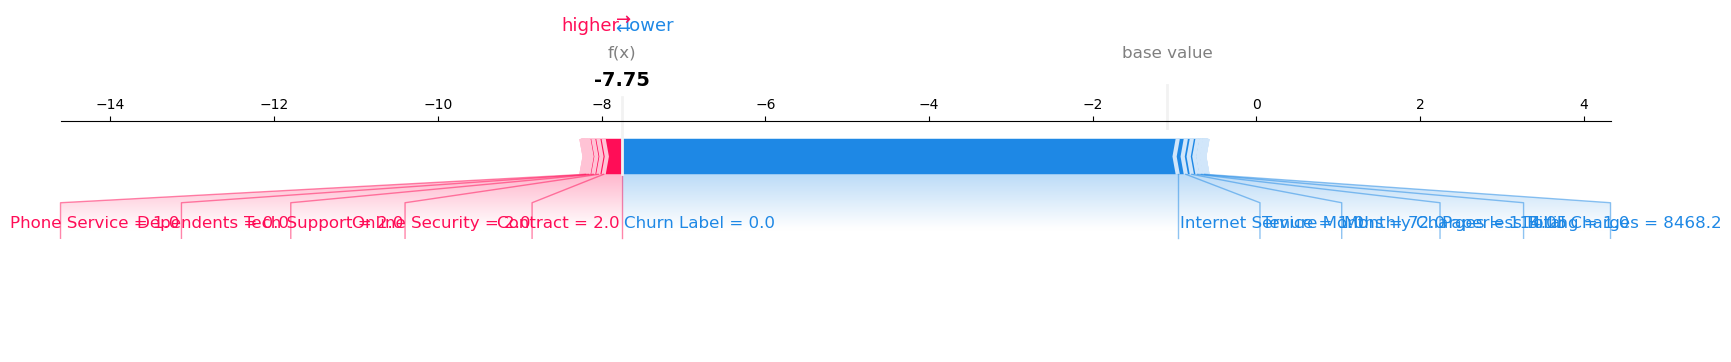


Customer #2 Raw Features:


CustomerID            1896.000000
Count                    1.000000
Country                  0.000000
State                    0.000000
City                   950.000000
Zip Code             93066.000000
Lat Long               584.000000
Latitude                34.297628
Longitude             -119.014627
Gender                   0.000000
Senior Citizen           1.000000
Partner                  0.000000
Dependents               0.000000
Tenure Months            8.000000
Phone Service            1.000000
Multiple Lines           2.000000
Internet Service         1.000000
Online Security          0.000000
Online Backup            0.000000
Device Protection        0.000000
Tech Support             2.000000
Streaming TV             2.000000
Streaming Movies         2.000000
Contract                 0.000000
Paperless Billing        1.000000
Payment Method           1.000000
Monthly Charges        100.150000
Total Charges          908.550000
Churn Label              0.000000
CLTV          

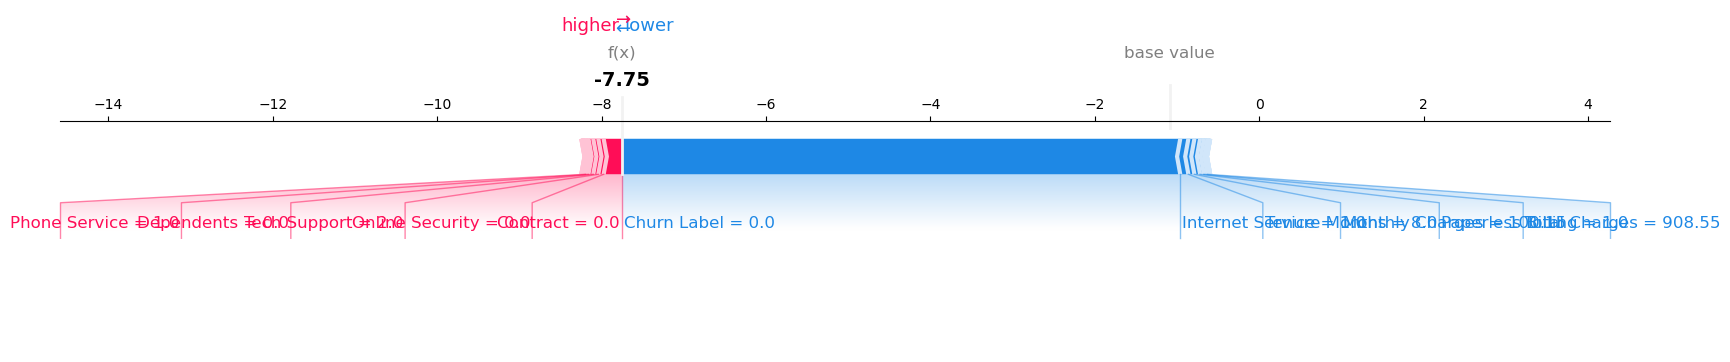


Customer #3 Raw Features:


CustomerID            6986.000000
Count                    1.000000
Country                  0.000000
State                    0.000000
City                    23.000000
Zip Code             92808.000000
Lat Long               254.000000
Latitude                33.850452
Longitude             -117.726668
Gender                   0.000000
Senior Citizen           0.000000
Partner                  1.000000
Dependents               0.000000
Tenure Months           41.000000
Phone Service            1.000000
Multiple Lines           2.000000
Internet Service         0.000000
Online Security          2.000000
Online Backup            2.000000
Device Protection        2.000000
Tech Support             0.000000
Streaming TV             2.000000
Streaming Movies         0.000000
Contract                 1.000000
Paperless Billing        1.000000
Payment Method           1.000000
Monthly Charges         78.350000
Total Charges         3211.200000
Churn Label              0.000000
CLTV          

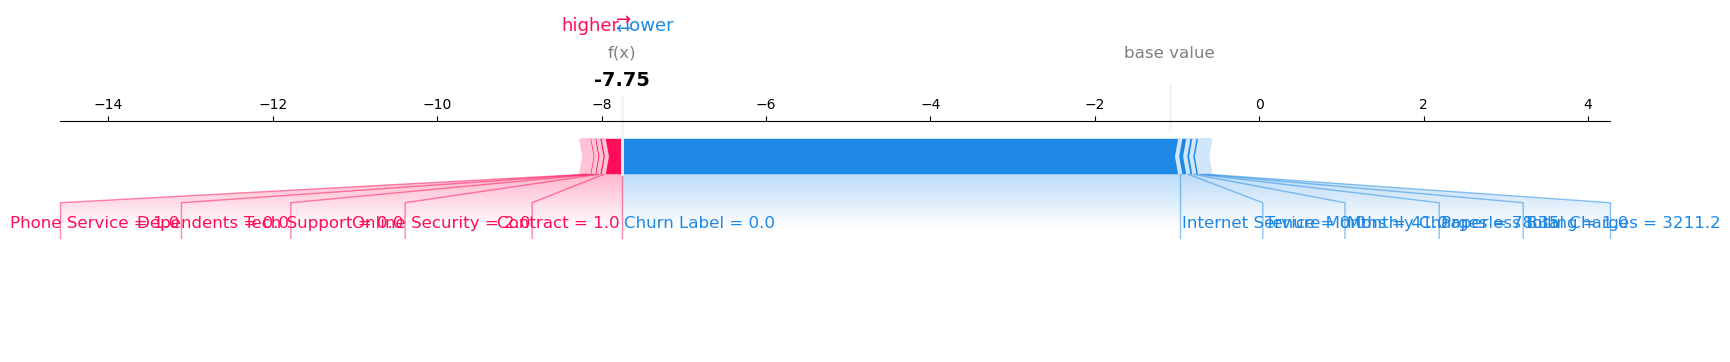

In [31]:

sample_customers=X_test.iloc[:3]

for i in range(3):
    print(f"\nCustomer #{i+1} Raw Features:")
    display(sample_customers.iloc[i])

    shap.force_plot(explainer.expected_value,
    shap_values[X_train.columns.get_indexer(sample_customers.iloc[i].index)][0],
    sample_customers.iloc[i],
    matplotlib=True)

In [32]:
importances=pd.DataFrame({"Feature":X_train.columns,"Mean_SHAP":
                          np.abs(shap_values).mean(0)}).sort_values("Mean_SHAP",ascending=False)
print("\nGloabal findings-top features driving churn:")
print(importances.head(10))

print("\ninterpretation")
print(""" *High monthly charges and totalcharges strongly influnces churn".
*contracttype tenure, and
Internetservice also major contributors.
*Month - to - month customers with high charges are most at risk.
*Long SHAP plots provide 
individual - level customer churn explanations.""")


Gloabal findings-top features driving churn:
              Feature  Mean_SHAP
28        Churn Label   7.070094
23           Contract   0.363874
12         Dependents   0.123914
26    Monthly Charges   0.096382
17    Online Security   0.088087
13      Tenure Months   0.079459
20       Tech Support   0.064084
16   Internet Service   0.030261
27      Total Charges   0.025147
24  Paperless Billing   0.020396

interpretation
 *High monthly charges and totalcharges strongly influnces churn".
*contracttype tenure, and
Internetservice also major contributors.
*Month - to - month customers with high charges are most at risk.
*Long SHAP plots provide 
individual - level customer churn explanations.
